In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def get_info(num_seeds, option, n=800, p=80, delta=0.0, ):
    # proposed and oc
    results = []
    try:
        for seed in range(num_seeds):
            with open(f'time/results_{option}/{n}_{p}_{delta}_{seed}.pkl', 'rb') as f:
                results += pickle.load(f)
        if len(results) != num_seeds * 50: # , (option, n, p, delta, len(results))
            print(n, p)
            raise Exception("Not enough results")
    except:
        # print(f"Error: {option} {n} {p} {delta}")
        return None
    num_searches = np.mean([r[0].search_count for r in results])
    time = np.mean([r[1] for r in results])

    return time, num_searches
# font size set
plt.rcParams.update({'font.size': 17})

print(get_info(1, "serial"))

(76.01033027648926, 31.12)


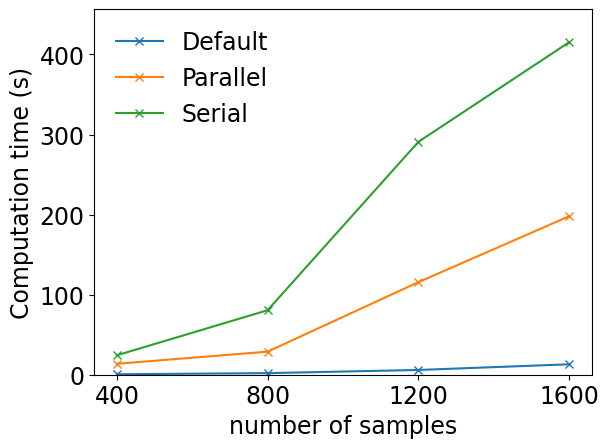

In [21]:
default_list = []
parallel_list = []
serial_list = []

num_seeds = 4
for n in (ns := [400, 800, 1200, 1600]):
    default, _ = get_info(num_seeds, 'default', n=n)
    parallel, _ = get_info(num_seeds, 'parallel', n=n)
    serial, _ = get_info(num_seeds, 'serial', n=n)
    default_list.append(default)
    parallel_list.append(parallel)
    serial_list.append(serial)

plt.plot(ns, default_list, label='Default', marker="x")
plt.plot(ns, parallel_list, label='Parallel', marker="x")
plt.plot(ns, serial_list, label='Serial', marker="x")
plt.ylim(0, np.max(serial_list) * 1.1)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Computation time (s)')
plt.legend(frameon=False, loc='upper left')
plt.savefig('time/images/time_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

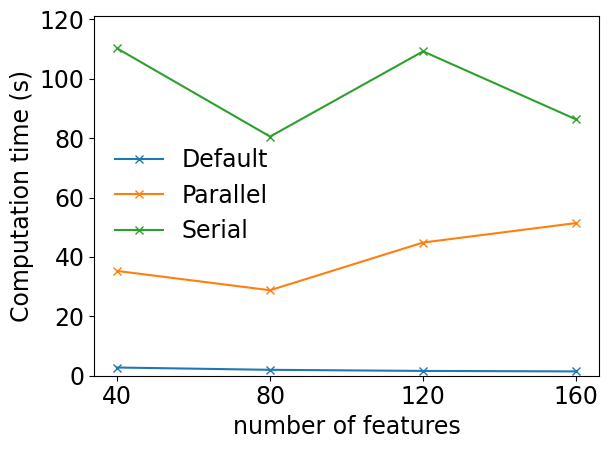

In [20]:
default_list = []
parallel_list = []
serial_list = []

num_seeds = 4
for p in (ps := [40, 80, 120, 160]):
    default, _ = get_info(num_seeds, 'default', p=p)
    parallel, _ = get_info(num_seeds, 'parallel', p=p)
    serial, _ = get_info(num_seeds, 'serial', p=p)
    default_list.append(default)
    parallel_list.append(parallel)
    serial_list.append(serial)

plt.plot(ps, default_list, label='Default', marker="x")
plt.plot(ps, parallel_list, label='Parallel', marker="x")
plt.plot(ps, serial_list, label='Serial', marker="x")
plt.ylim(0, np.max(serial_list) * 1.1)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Computation time (s)')
plt.legend(frameon=False, loc='center left')
plt.savefig('time/images/time_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

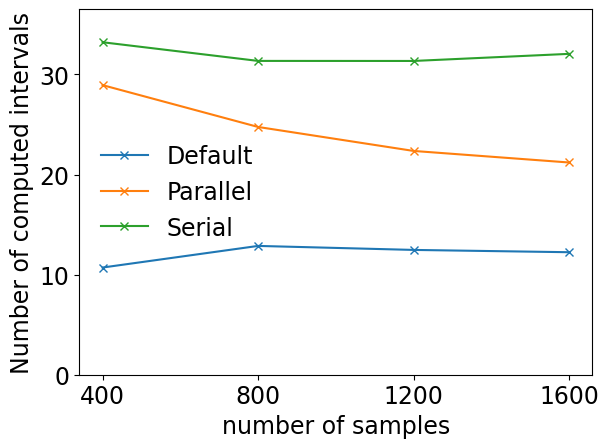

In [22]:
default_list = []
parallel_list = []
serial_list = []

num_seeds = 4
for n in (ns := [400, 800, 1200, 1600]):
    _, default = get_info(num_seeds, 'default', n=n)
    _, parallel = get_info(num_seeds, 'parallel', n=n)
    _, serial = get_info(num_seeds, 'serial', n=n)
    default_list.append(default)
    parallel_list.append(parallel)
    serial_list.append(serial)

plt.plot(ns, default_list, label='Default', marker="x")
plt.plot(ns, parallel_list, label='Parallel', marker="x")
plt.plot(ns, serial_list, label='Serial', marker="x")
plt.ylim(0.0, np.max(serial_list) * 1.1)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Number of computed intervals')
plt.legend(frameon=False, loc='center left')
plt.savefig('time/images/num_interval_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

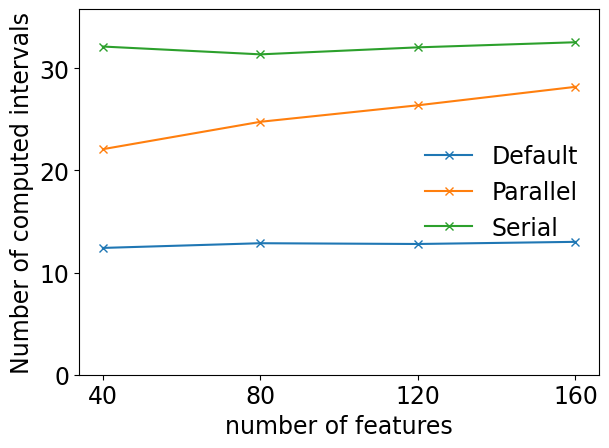

In [23]:
default_list = []
parallel_list = []
serial_list = []

num_seeds = 4
for p in (ps := [40, 80, 120, 160]):
    _, default = get_info(num_seeds, 'default', p=p)
    _, parallel = get_info(num_seeds, 'parallel', p=p)
    _, serial = get_info(num_seeds, 'serial', p=p)
    default_list.append(default)
    parallel_list.append(parallel)
    serial_list.append(serial)

plt.plot(ps, default_list, label='Default', marker="x")
plt.plot(ps, parallel_list, label='Parallel', marker="x")
plt.plot(ps, serial_list, label='Serial', marker="x")
plt.ylim(0.0, np.max(serial_list) * 1.1)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Number of computed intervals')
plt.legend(frameon=False, loc='center right')
plt.savefig('time/images/num_interval_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

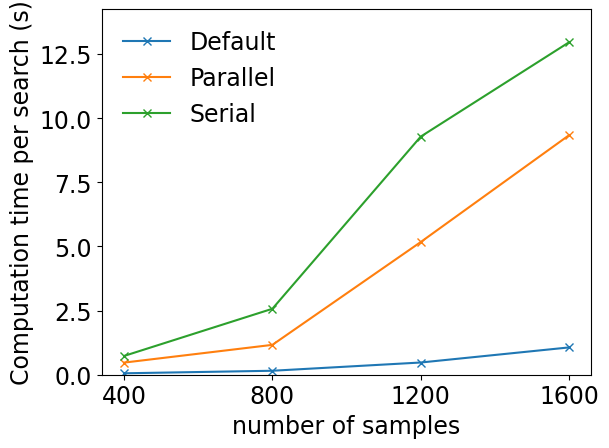

In [24]:
default_list = []
parallel_list = []
serial_list = []

num_seeds = 4
for n in (ns := [400, 800, 1200, 1600]):
    default_time, default_counts = get_info(num_seeds, 'default', n=n)
    parallel_time, parallel_counts = get_info(num_seeds, 'parallel', n=n)
    serial_time, serial_counts = get_info(num_seeds, 'serial', n=n)
    default_list.append(default_time / default_counts)
    parallel_list.append(parallel_time / parallel_counts)
    serial_list.append(serial_time / serial_counts)

plt.plot(ns, default_list, label='Default', marker="x")
plt.plot(ns, parallel_list, label='Parallel', marker="x")
plt.plot(ns, serial_list, label='Serial', marker="x")
plt.ylim(0.0, np.max(serial_list) * 1.1)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Computation time per search (s)')
plt.legend(frameon=False, loc='upper left')
plt.savefig('time/images/time_per_search_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

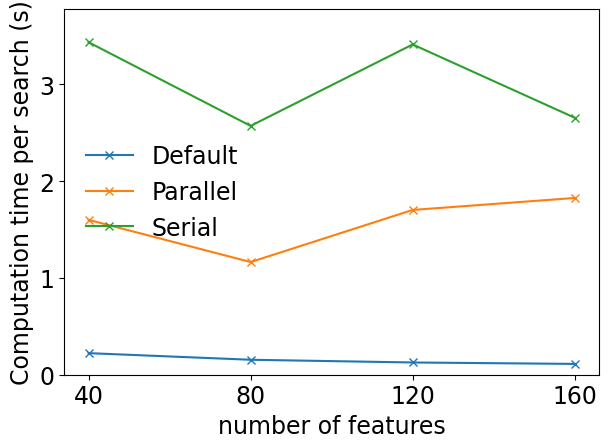

In [26]:
default_list = []
parallel_list = []
serial_list = []

num_seeds = 4
for p in (ps := [40, 80, 120, 160]):
    default_time, default_counts = get_info(num_seeds, 'default', p=p)
    parallel_time, parallel_counts = get_info(num_seeds, 'parallel', p=p)
    serial_time, serial_counts = get_info(num_seeds, 'serial', p=p)
    default_list.append(default_time / default_counts)
    parallel_list.append(parallel_time / parallel_counts)
    serial_list.append(serial_time / serial_counts)

plt.plot(ps, default_list, label='Default', marker="x")
plt.plot(ps, parallel_list, label='Parallel', marker="x")
plt.plot(ps, serial_list, label='Serial', marker="x")
plt.ylim(0.0, np.max(serial_list) * 1.1)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Computation time per search (s)')
plt.legend(frameon=False, loc='center left')
plt.savefig('time/images/time_per_search_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()